### VADER

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import re

from time import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [3]:
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Training set

In [2]:
columns = ['id','text_final', 'polarity', 'length']

dftrain = pd.read_csv('finaltrain.csv',
                     header = 0, 
                     usecols = [1,2], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [3]:
dftrain.head(10)

,text_final,polarity
0,"@USER @URL - aw , that ' s a bummer . you sho...",0
1,is upset that he can not update his facebook b...,0
2,@USER i dived many times for the ball . manage...,0
3,my whole body feels itchy and like its on fire,0
4,"@USER no , it ' s not behaving at all . i am m...",0
5,@USER not the whole crew,0
6,need a hug,0
7,@USER hey long time no see ! yes . rains a bi...,0
8,@USER nope they did not have it,0
9,@USER que me muera ?,0


In [4]:
dftrain.tail(10)

,text_final,polarity
1596365,@USER im glad ur doing well,4
1596366,woo ! xbox is back,4
1596367,@USER @USER m that sounds absolutely perfect ...,4
1596368,recovering from the long weekend,4
1596369,"@USER yeah , that does work better than just w...",4
1596370,just woke up . having no school is the best fe...,4
1596371,thewdb . com - very cool to hear old walt inte...,4
1596372,are you ready for your mojo makeover ? ask me ...,4
1596373,happy 3 8 th birthday to my boo of all time !...,4
1596374,happy charity tuesday @USER @USER @USER,4


#### Transform polarity 4 in 1 (positive class)

In [5]:
dftrain['polarity'].replace(to_replace=[4],value=1,inplace=True)

In [6]:
print("negative tweets:", len(dftrain[dftrain['polarity']==0]))
print("positive tweets:", len(dftrain[dftrain['polarity']==1]))

negative tweets: 798233
positive tweets: 798142


In [7]:
dftrain.tail()

,text_final,polarity
1596370,just woke up . having no school is the best fe...,1
1596371,thewdb . com - very cool to hear old walt inte...,1
1596372,are you ready for your mojo makeover ? ask me ...,1
1596373,happy 3 8 th birthday to my boo of all time !...,1
1596374,happy charity tuesday @USER @USER @USER,1


#### Apply VADER

In [8]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(dftrain)):

    k = analyser.polarity_scores(dftrain.iloc[i]['text_final'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

Wall time: 0 ns


1596375

In [9]:
dftrain.head()

,text_final,polarity
0,"@USER @URL - aw , that ' s a bummer . you sho...",0
1,is upset that he can not update his facebook b...,0
2,@USER i dived many times for the ball . manage...,0
3,my whole body feels itchy and like its on fire,0
4,"@USER no , it ' s not behaving at all . i am m...",0


In [10]:
dftrain['VADER_score'] = compval1

In [11]:
dftrain.tail()

,text_final,polarity,VADER_score
1596370,just woke up . having no school is the best fe...,1,0.5423
1596371,thewdb . com - very cool to hear old walt inte...,1,0.4376
1596372,are you ready for your mojo makeover ? ask me ...,1,0.3612
1596373,happy 3 8 th birthday to my boo of all time !...,1,0.6114
1596374,happy charity tuesday @USER @USER @USER,1,0.7579


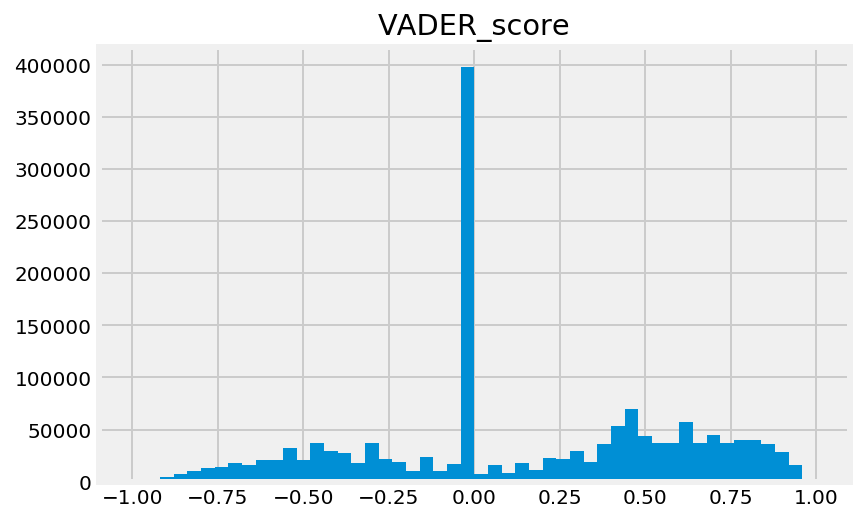

In [19]:
dftrain.hist('VADER_score', bins = 50)
plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

In [20]:
scores_train = dftrain['VADER_score'].tolist()

In [21]:
y_train = dftrain['polarity'].tolist()

In [22]:
list(zip(scores_train,y_train))

[(-0.3818, 0),
 (-0.75, 0),
 (0.4939, 0),
 (-0.25, 0),
 (-0.6597, 0),
 (0.0, 0),
 (0.4767, 0),
 (0.807, 0),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (-0.5994, 0),
 (-0.1027, 0),
 (0.3724, 0),
 (0.3987, 0),
 (-0.9081, 0),
 (0.0, 0),
 (0.6696, 0),
 (0.1779, 0),
 (0.0, 0),
 (-0.1779, 0),
 (0.0, 0),
 (0.3818, 0),
 (0.0, 0),
 (-0.5719, 0),
 (-0.4767, 0),
 (-0.5719, 0),
 (0.7669, 0),
 (-0.024, 0),
 (-0.4019, 0),
 (-0.2144, 0),
 (0.0, 0),
 (0.5983, 0),
 (-0.4767, 0),
 (-0.4939, 0),
 (-0.6711, 0),
 (-0.1511, 0),
 (0.2411, 0),
 (-0.1531, 0),
 (-0.1419, 0),
 (0.0, 0),
 (-0.8609, 0),
 (0.2481, 0),
 (-0.5719, 0),
 (0.629, 0),
 (0.3612, 0),
 (0.5719, 0),
 (-0.6486, 0),
 (-0.2578, 0),
 (-0.2023, 0),
 (0.7845, 0),
 (0.0, 0),
 (-0.2263, 0),
 (0.4767, 0),
 (-0.2134, 0),
 (-0.5719, 0),
 (-0.3818, 0),
 (-0.4215, 0),
 (0.6662, 0),
 (0.1431, 0),
 (0.0, 0),
 (0.1655, 0),
 (-0.4215, 0),
 (-0.1779, 0),
 (0.3935, 0),
 (0.0, 0),
 (-0.7783, 0),
 (0.0, 0),
 (0.2732, 0),
 (-0.3131, 0),
 (0.3802, 0),
 (0.2484, 

#### Save csv

In [25]:
dftrain.to_csv('VADER_train.csv')